In [9]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

import baraffe_tables

%matplotlib inline

In [10]:
from baraffe_tables.table_search import baraffe_table_search
row = baraffe_table_search(column="M/Ms", value=0.08, age=4.0, model="2003", age_interp=True)
print(row)

Interpolating tables 1.000 Gyr and 5.000 Gyr to 4.0 Gyr
{'M/Ms': 0.08, 'Teff': 2335.75, 'L/Ls': -3.584, 'g': 5.345, 'R': 0.1, 'Mv': 19.0, 'Mr': 16.2, 'Mi': 13.82, 'Mj': 11.395, 'Mh': 11.025, 'Mk': 10.772, 'Mll': 9.938, 'Mm': 10.39}


In [35]:
mp_arr = np.array((0.5,1,5,12))*0.0009545942339693249 #Jupiter masses to solar masses
#age_arr = np.array((1.e-3,3.e-3,5.e-3,0.01,0.03,0.05,0.1,0.3,0.5,1.0,3.0,5.0,10.))
age_arr = 10**np.linspace(6.,10.,25)/1.e9
L_matrix = np.zeros((len(mp_arr),len(age_arr)))
Teff_matrix = np.zeros((len(mp_arr),len(age_arr)))

for i, mp in enumerate(mp_arr):
    for j, age in enumerate(age_arr):
        row = baraffe_table_search(column="M/Ms", value=mp, age=age, model="2003", age_interp=True)
        #sprint(row)
        L_matrix[i,j] = row['L/Ls']
        Teff_matrix[i,j] = row['Teff']
    

Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0014677992676220707 Gyr
Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0021544346900318825 Gyr
Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0031622776601683794 Gyr
Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0046415888336127815 Gyr
Interpolating tables 0.005 Gyr and 0.010 Gyr to 0.006812920690579608 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.014677992676220676 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.021544346900318825 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.03162277660168379 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.046415888336127725 Gyr
Interpolating tables 0.050 Gyr and 0.100 Gyr to 0.06812920690579607 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.14677992676220677 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.21544346900318778 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.31622776601683794 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.46

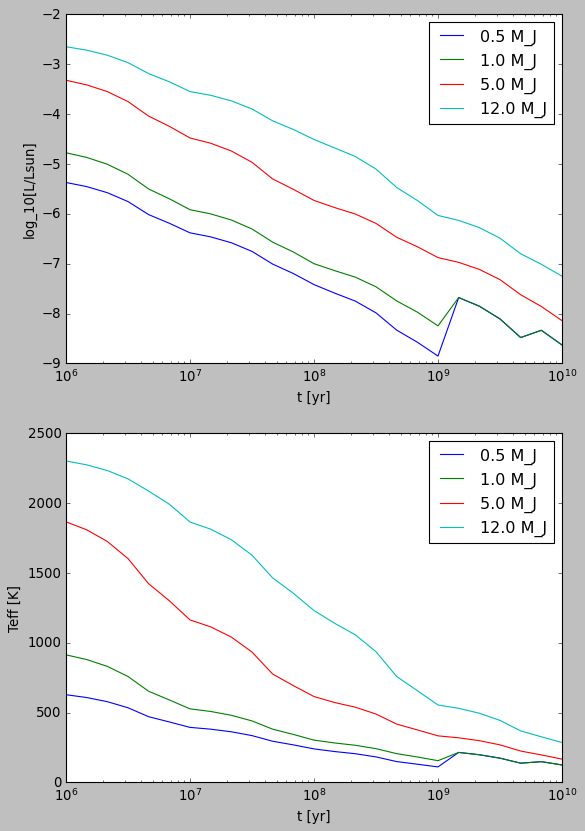

In [36]:
fig, axes = plt.subplots(2,1,figsize=(8,12))
for i, mp in enumerate(mp_arr):
    axes[0].plot(age_arr*1.e9, L_matrix[i], '-',label="{0} M_J".format(mp/0.0009545942339693249))
    axes[1].plot(age_arr*1.e9, Teff_matrix[i], '-',label="{0} M_J".format(mp/0.0009545942339693249))
axes[0].legend(loc="best")
axes[1].legend(loc="best")
axes[0].set_xscale("log")
axes[1].set_xscale("log")

axes[0].set_xlabel("t [yr]")
axes[1].set_xlabel("t [yr]")
axes[0].set_ylabel("log_10[L/Lsun]")
axes[1].set_ylabel("Teff [K]")

axes[0].set_xlim(1.e6,1.e10)
axes[1].set_xlim(1.e6,1.e10)

#plt.show()
plt.savefig("./baraffe+2003_fig1.pdf")